In [1]:
import numpy as np
from pathlib import Path

import hydra
import numpy as np
import ufl
from dolfinx.fem import (
    Function,
    dirichletbc,
    functionspace,
    locate_dofs_topological,
)
from dolfinx.mesh import create_unit_square, locate_entities_boundary
from hydra.utils import instantiate
from mpi4py import MPI
from nigbms.tasks import (
    PETScLinearSystemTask,
    PyTorchLinearSystemTask,
    TaskConstructor,
    TaskParams,
    save_petsc_task,
    save_pytorch_task,
)
from nigbms.utils.petsc import LinearProblem
from tensordict import tensorclass
from torch import Tensor
from tqdm import tqdm
from ufl import SpatialCoordinate, TestFunction, TrialFunction, div, dx, grad, inner


from examples.poisson2d.task import Poisson2DParams, Poisson2DTaskConstructor

In [44]:
params = Poisson2DParams(
    k_coef=100.0,
    Tmax=100,
    u_center=[0.1, 0.1],
    k_center=[0.1, 0.8]
)
constructor = Poisson2DTaskConstructor()
task = constructor(params)

In [45]:
problem = task.problem
uh = problem.solve()

In [46]:
from nigbms.utils.convert import petscmat2scipycsr
A = petscmat2scipycsr(problem.A)

In [47]:
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

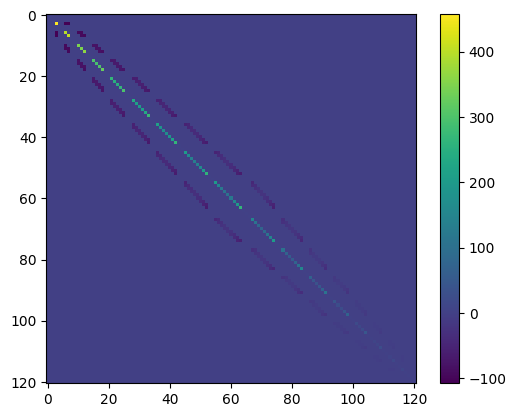

In [48]:
import matplotlib.pyplot as plt
plt.imshow(A.toarray())
plt.colorbar()


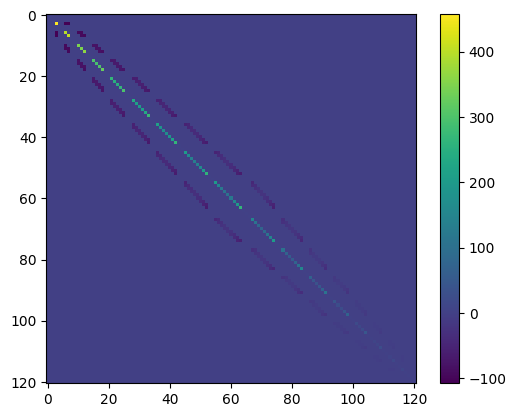

In [49]:
import matplotlib.pyplot as plt
plt.imshow(A.toarray())
plt.colorbar()

In [50]:
mesh = create_unit_square(MPI.COMM_WORLD, params.Nx, params.Ny)

In [51]:
tdim = mesh.topology.dim

In [52]:
import pyvista
print(pyvista.global_theme.jupyter_backend)

trame


In [53]:
from dolfinx import plot
pyvista.start_xvfb()
mesh.topology.create_connectivity(tdim, tdim)
topology, cell_types, geometry = plot.vtk_mesh(mesh, tdim)
grid = pyvista.UnstructuredGrid(topology, cell_types, geometry)

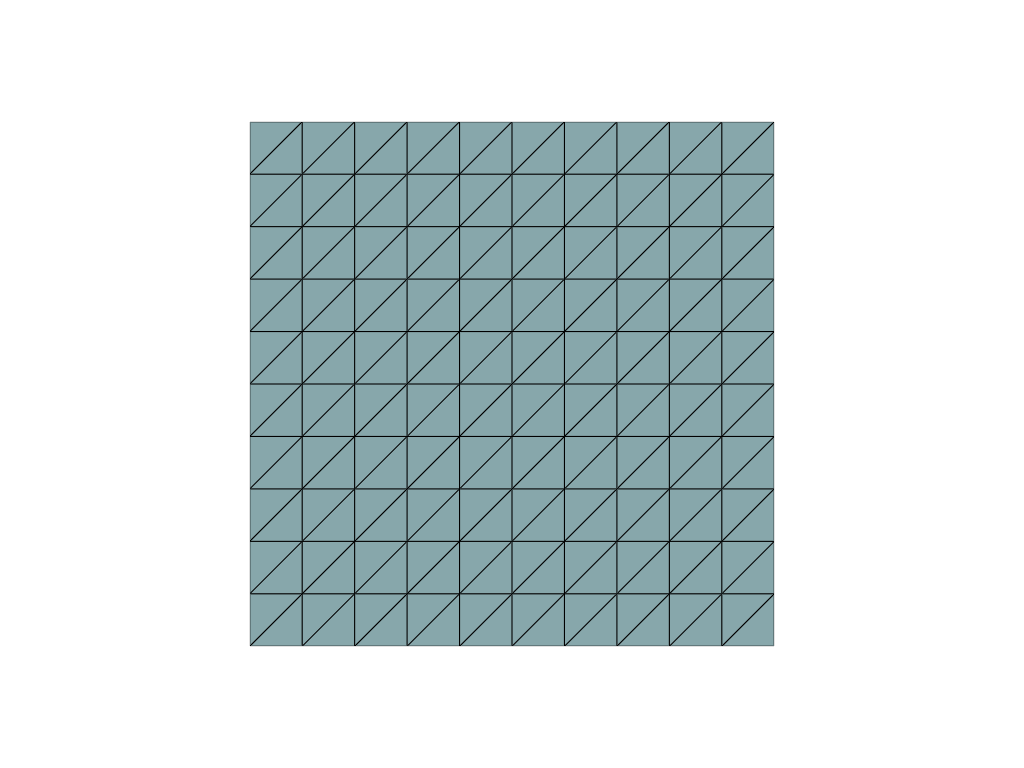

In [54]:
plotter = pyvista.Plotter()
plotter.add_mesh(grid, show_edges=True)
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("fundamentals_mesh.png")

In [55]:
V = functionspace(mesh, ("Lagrange", params.degree))
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(V)

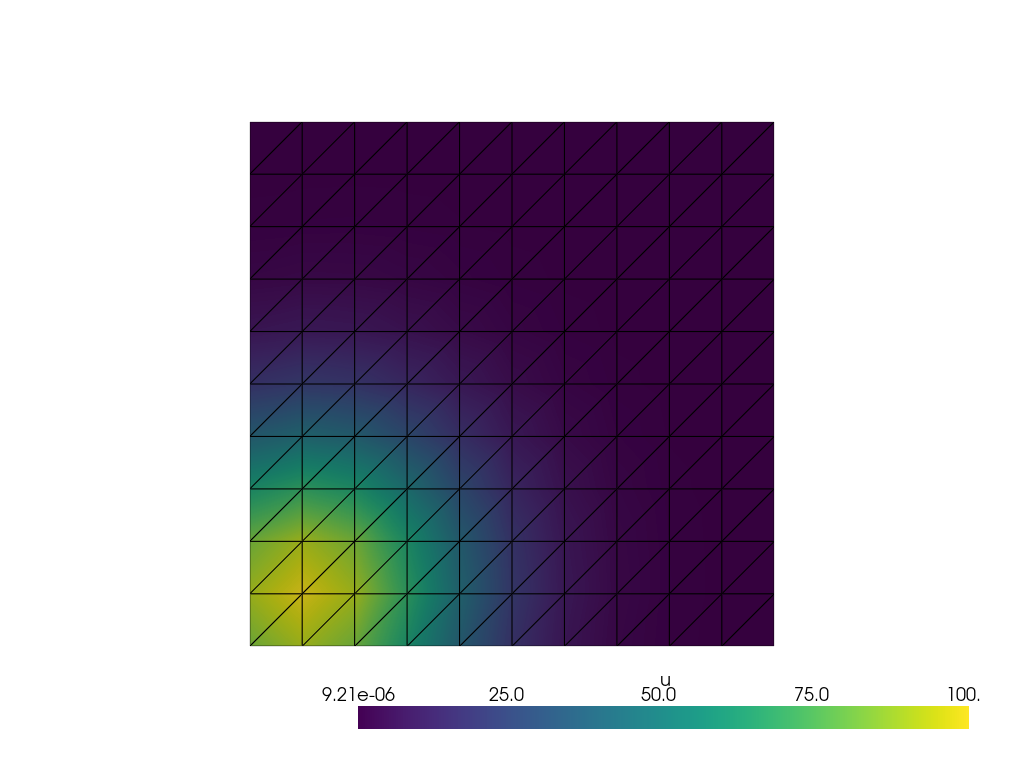

In [56]:
uh = problem.solve()
u_grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
u_grid.point_data["u"] = uh.x.array.real
u_grid.set_active_scalars("u")
u_plotter = pyvista.Plotter()
u_plotter.add_mesh(u_grid, show_edges=True)
u_plotter.view_xy()
if not pyvista.OFF_SCREEN:
    u_plotter.show()

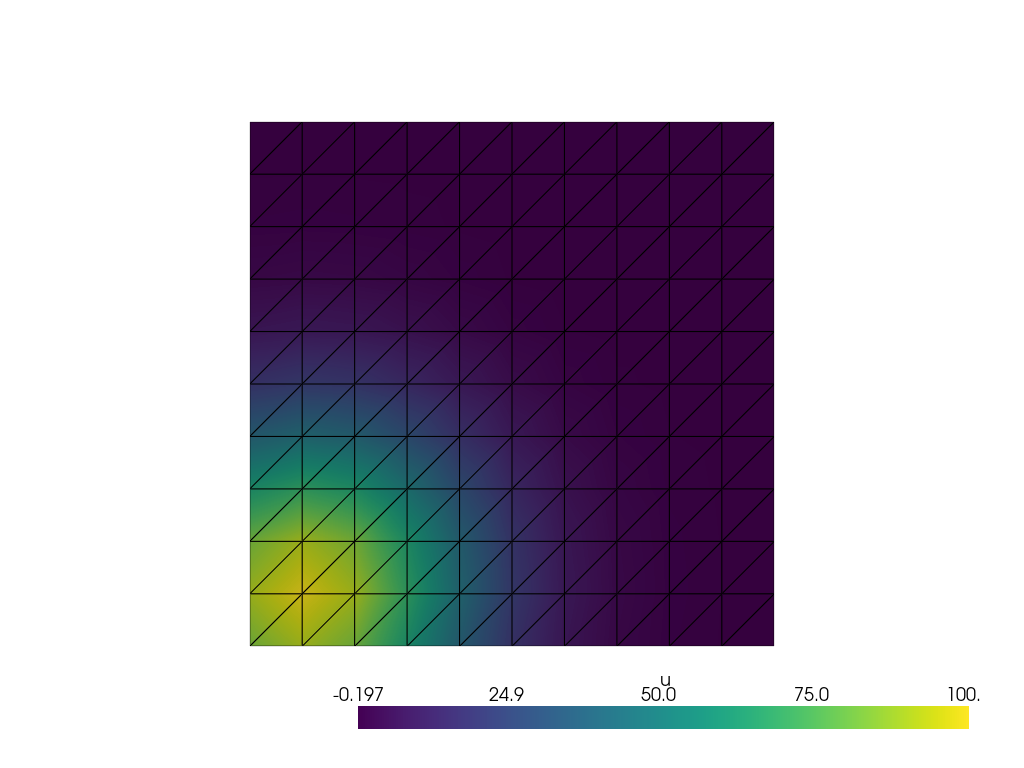

In [43]:
uh = problem.solve()
u_grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
u_grid.point_data["u"] = uh.x.array.real
u_grid.set_active_scalars("u")
u_plotter = pyvista.Plotter()
u_plotter.add_mesh(u_grid, show_edges=True)
u_plotter.view_xy()
if not pyvista.OFF_SCREEN:
    u_plotter.show()